# EDA on Titanic dataset 

In [1]:
# Variable	Definition	   Key
# survival	Survival	   0 = No, 1 = Yes
# pclass	    Ticket class   1 = 1st, 2 = 2nd, 3 = 3rd
# sex	        Sex	
# Age	        Age in years	
# sibsp	    # of siblings / spouses aboard the Titanic	
# parch	    # of parents / children aboard the Titanic	
# ticket	    Ticket number	
# fare	    Passenger fare	
# cabin	    Cabin number	
# embarked    Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [2]:
# Importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Loading datset
ttnc = sns.load_dataset('titanic')
ttnc.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
ttnc.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:>

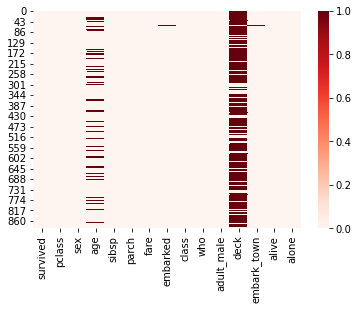

In [6]:
sns.heatmap(data = ttnc.isnull(), cmap = 'Reds', cbar = True)
#  it is to check is there any null values in the data as you see in the heat map we can identify it easily